In [97]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report



<img src="https://waste4change.com/blog/wp-content/uploads/WaterQuality.jpg" width="100%">

All plants and animals need water to survive. There can be no life on earth without water. Why is water so important? Because 60 percent of our body weight is made up of water. Our bodies use water in all the cells, organs, and tissues, to help regulate body temperature and maintain other bodily functions. Because our bodies lose water through breathing, sweating, and digestion, it's crucial to rehydrate and replace water by drinking fluids and eating foods that contain water.

Let’s look at all the ways water impacts our lives…

1. Water helps by creating saliva
2. It regulates body temperature
3. Water aids cognitive functions
4. Water protects the tissues, spinal cord, and joints
5. Water maximizes our physical performance
6. It helps to boost our energy levels
7. Water prevents overall dehydration


### Problem Statement:
Mengklasifikasikan kualitas air apakah layak minum atau tidak berdasarkan fitur yang disediakan.

### Feature Details
1. pH value:
PH merupakan parameter penting dalam mengevaluasi keseimbangan asam-basa air. Ini juga merupakan indikator kondisi asam atau basa status air. WHO telah merekomendasikan batas maksimum pH yang diizinkan dari 6,5 hingga 8,5. Rentang investigasi saat ini adalah 6,52-6,83 yang berada dalam kisaran standar WHO.

2. Hardness:
Kekerasan terutama disebabkan oleh garam kalsium dan magnesium. Garam-garam ini larut dari endapan geologis yang dilalui air. Lamanya waktu kontak air dengan bahan penghasil kesadahan membantu menentukan berapa banyak kesadahan yang ada dalam air baku. Kekerasan awalnya didefinisikan sebagai kapasitas air untuk mengendapkan sabun yang disebabkan oleh Kalsium dan Magnesium.

3. Solids (Total dissolved solids - TDS):
Air memiliki kemampuan untuk melarutkan berbagai mineral atau garam anorganik dan organik seperti kalium, kalsium, natrium, bikarbonat, klorida, magnesium, sulfat, dll. Mineral ini menghasilkan rasa yang tidak diinginkan dan warna yang encer dalam penampilan air. Ini adalah parameter penting untuk penggunaan air. Air dengan nilai TDS yang tinggi menunjukkan bahwa air tersebut sangat termineralisasi. Batas yang diinginkan untuk TDS adalah 500 mg/l dan batas maksimum adalah 1000 mg/l yang ditentukan untuk tujuan minum.

4. Chloramines:
Klorin dan kloramin adalah disinfektan utama yang digunakan dalam sistem air publik. Kloramin paling sering terbentuk ketika amonia ditambahkan ke klorin untuk mengolah air minum. Kadar klorin hingga 4 miligram per liter (mg/L atau 4 bagian per juta (ppm)) dianggap aman dalam air minum.

5. Sulfate:
Sulfat adalah zat alami yang ditemukan di mineral, tanah, dan batuan. Mereka hadir di udara ambien, air tanah, tanaman, dan makanan. Penggunaan komersial utama sulfat adalah dalam industri kimia. Konsentrasi sulfat dalam air laut adalah sekitar 2.700 miligram per liter (mg/L). Ini berkisar antara 3 sampai 30 mg/L di sebagian besar persediaan air tawar, meskipun konsentrasi yang jauh lebih tinggi (1000 mg/L) ditemukan di beberapa lokasi geografis.

6. Conductivity:
Air murni bukanlah penghantar arus listrik yang baik, melainkan isolator yang baik. Peningkatan konsentrasi ion meningkatkan konduktivitas listrik air. Umumnya, jumlah padatan terlarut dalam air menentukan konduktivitas listrik. Konduktivitas listrik (EC) sebenarnya mengukur proses ionik dari suatu larutan yang memungkinkannya untuk mentransmisikan arus. Menurut standar WHO, nilai EC tidak boleh melebihi 400 S/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) di perairan sumber berasal dari bahan organik alami (NOM) yang membusuk serta sumber sintetis. TOC adalah ukuran jumlah total karbon dalam senyawa organik dalam air murni. Menurut US EPA < 2 mg/L sebagai TOC pada air olahan/minum, dan <4 mg/Lit pada sumber air yang digunakan untuk pengolahan. 

8. Trihalomethanes:
THM adalah bahan kimia yang dapat ditemukan dalam air yang diolah dengan klorin. Konsentrasi THM dalam air minum bervariasi sesuai dengan tingkat bahan organik di dalam air, jumlah klorin yang dibutuhkan untuk mengolah air, dan suhu air yang diolah. Kadar THM hingga 80 ppm dianggap aman dalam air minum.

9. Turbidity:
Kekeruhan air tergantung pada jumlah zat padat yang ada dalam keadaan tersuspensi. Ini adalah ukuran sifat pemancar cahaya air dan tes ini digunakan untuk menunjukkan kualitas pembuangan limbah sehubungan dengan materi koloid. Nilai rata-rata kekeruhan yang diperoleh untuk Kampus Wondo Genet (0,98 NTU) lebih rendah dari nilai rekomendasi WHO sebesar 5,00 NTU.

10. Potability:
Menunjukkan apakah air aman untuk dikonsumsi manusia di mana 1 berarti Dapat diminum dan 0 berarti Tidak dapat diminum.


# Read Data

In [98]:
df= pd.read_csv("water_potability.csv")

# Initial Analysis

In [99]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Ada 9 fitur Independen dan 1 fitur dependen. Detail untuk setiap fitur disediakan di atas. tujuannya adalah untuk menggunakan fitur Potabilitas sebagai fitur target untuk masalah klasifikasi. Mari lakukan lebih banyak analisis untuk mempelajari dataset dengan lebih baik.

### Datatype of the features

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Except Target feature, other features are float and continueous value. we can convert the Portability into Categoring feature

In [101]:
df['Potability']=df['Potability'].astype('category')

In [102]:
#create approve limit for each features based on data available in Google search
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

### Statistical analysis

In [103]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


Dari tabel di atas, kita dapat melihat bahwa jumlah setiap fitur tidak sama. jadi harus ada beberapa nilai nol.
Fitur padat memiliki mean dan standar deviasi yang lebih tinggi daripada fitur lainnya. sehingga distribusinya harus tinggi.
Namun, uraian di atas adalah untuk populasi secara keseluruhan. mari kita coba yang sama untuk 2 sampel berdasarkan fitur Portabilitas

In [104]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')


,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [105]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


Mean and std dari hampir semua fitur serupa untuk kedua sampel. ada beberapa perbedaan dalam fitur Solids. Analisis lebih lanjut menggunakan pengujian hipotetis dapat membantu kita mengidentifikasi signifikansinya.

# Exploratory Data Analysis

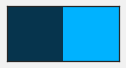

In [106]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

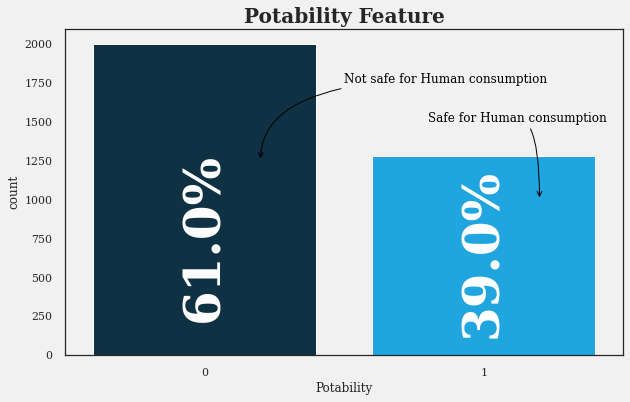

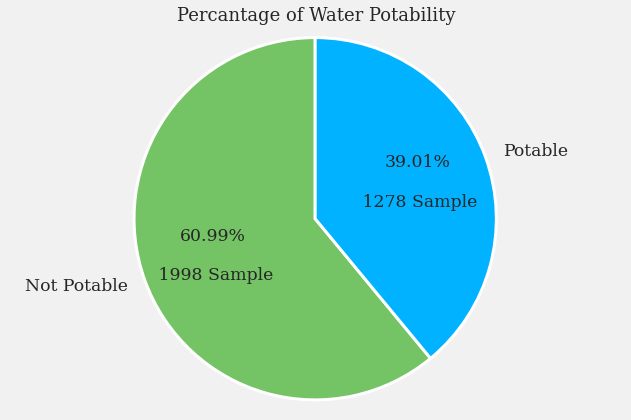

In [111]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')
fig, ax = plt.subplots(figsize=(9,6))
values = list(df['Potability'].value_counts().values)
labels = ['Not Potable','Potable']
color = ['#74C365','#00b2ff']
ax.pie(values, labels=labels,  autopct=lambda p:f'{p:.2f}%\n\n {p*sum(values)/100 :.0f} Sample' ,colors=color,
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'},
       startangle=90)
ax.set_title('Percantage of Water Potability', size=18)
ax.axis('equal')
plt.tight_layout()
plt.show()

There is imbalance in the Target variable. which should be considered for modeling

### Distribution plots

In [56]:
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


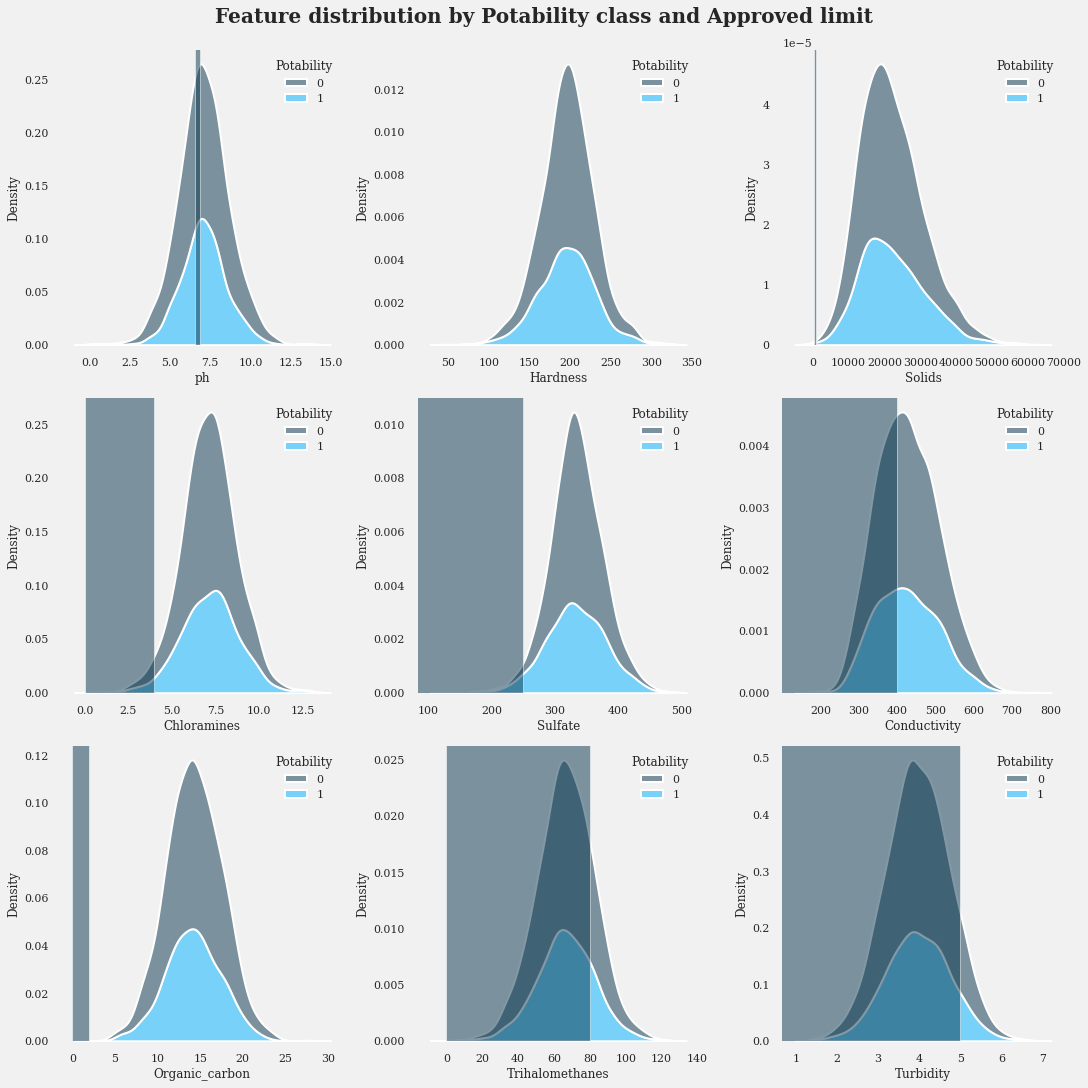

In [57]:
from matplotlib.patches import Rectangle
int_cols = df.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

Berdasarkan batas yang disetujui, kita dapat dengan jelas melihat perbedaan dalam klasifikasi air. Contoh: distribusi air yang tidak dapat diminum memiliki konduktivitas yang tinggi dibandingkan dengan air yang dapat diminum. sama berlaku untuk Kekeruhan, Trihalomethanes.
Namun, nilai Ph, Kloramin, Sulfat, Keberadaan karbon organik tidak menunjukkan perbedaan yang signifikan. Saya harap pengujian hipotetis dapat membantu kita di sini.


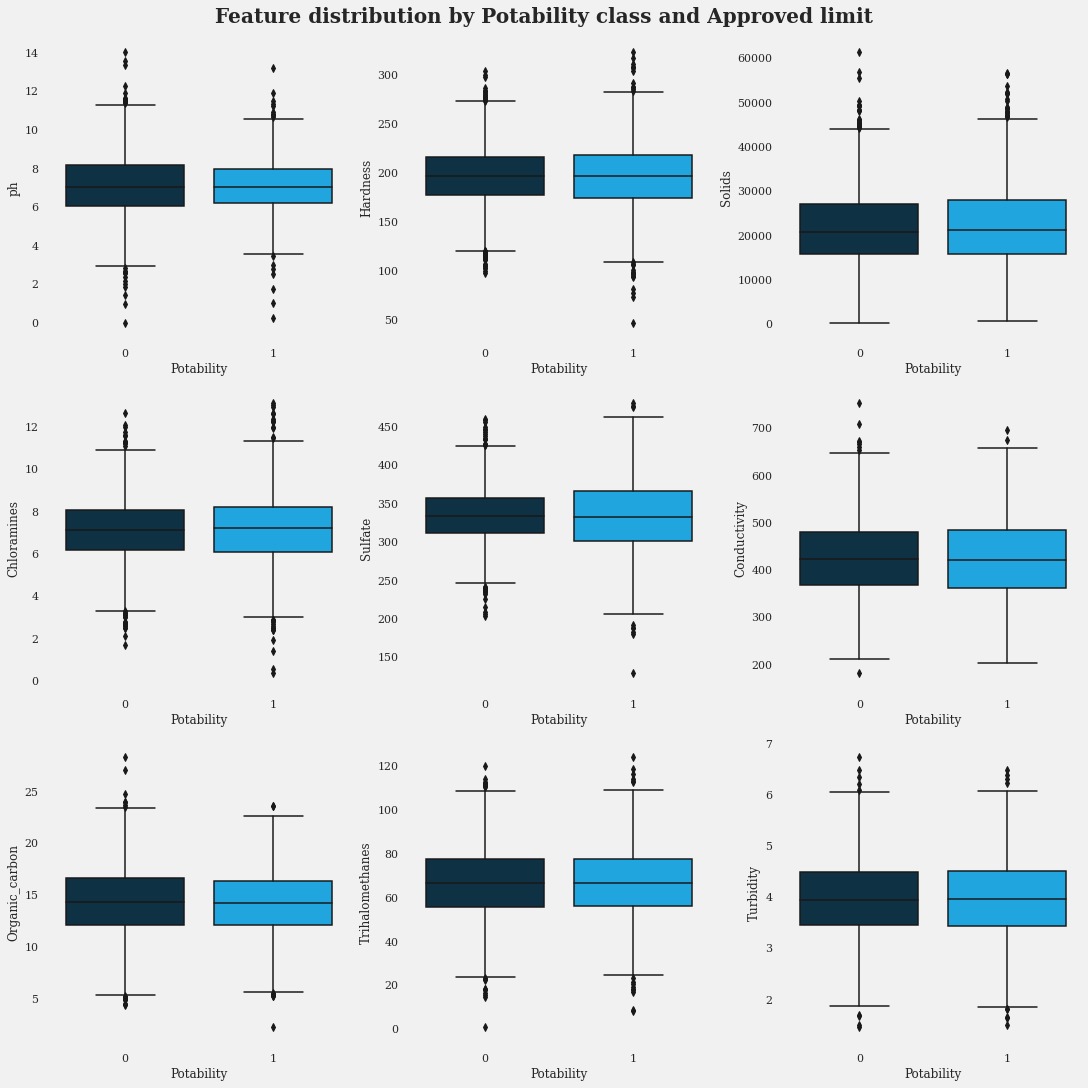

In [58]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

Ada outlier dalam dataset, kita perlu menangani hal yang sama.
sebagian besar sarana fitur terlihat serupa dan perbedaannya sangat sedikit. sebagaimana disebutkan dalam pengamatan di atas, pengujian hipotesis akan menjadi pilihan yang tepat untuk mengidentifikasi singnificance. sebelum melakakukan pengujian hypotesis kita akan mengecek missing values terlebih dahulu.

### Check for missing values

In [59]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Fitur ph, Sulfate dan Trihalomethanes memiliki nilai nol. mari kita periksa detailnya 

In [60]:
df[df['Sulfate'].isnull()]
df[df['ph'].isnull()]
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


Karena nilai yang hilang ada pada kedua kelas (Potabilitas 1 & 0), kita dapat menggantinya dengan median populasi. jadi, kami akan mengganti nilai Nan berdasarkan median sampel dari kedua kelas. Walaupun distibusi dari masing-masing variabel yang memiliki nilai NaN terlihat terdistribusi mendekati normal, namun jika dilihat dari boxplot diatas dapat dilihat terdapat beberapa outlier. Oleh karena itu akan lebih aman jika kita mengisi nilai NaN dengan median dari masing-masing variabelnya.

In [61]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('median'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('median'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('median'))

In [62]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Hypothesis testing

Ho (Null Hypothesis) - Mean for both samples/group are same  
H1 (Alternate Hypothesis) - Mean for both samples/group significantly different.  
Significant level - 90%  
Alpha - 0.5% (ie., 0.1)  

p_value for ph is 0.8661337322985256 we accept the null hypothesis
p_value for Hardness is 0.42854158740864623 we accept the null hypothesis
p_value for Solids is 0.053463638184504905 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Chloramines is 0.17361022465074671 we accept the null hypothesis
p_value for Sulfate is 0.14706867377667526 we accept the null hypothesis
p_value for Conductivity is 0.6418845485973679 we accept the null hypothesis
p_value for Organic_carbon is 0.08599746163873828 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Trihalomethanes is 0.6848358731256157 we accept the null hypothesis
p_value for Turbidity is 0.9279391620837931 we accept the null hypothesis


Text(6, 0.12, 'Significance level: 0.1')

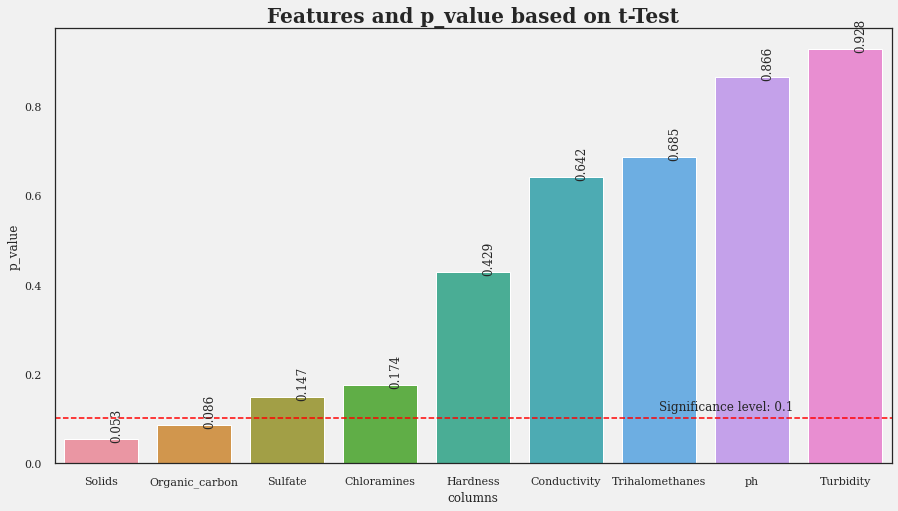

In [86]:
from scipy.stats import ttest_ind
p_val=[]
for i in int_cols:
    pota_1 = df[df['Potability']==1][i]
    pota_0 = df[df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value < 0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

stats_test=pd.DataFrame(columns=['columns','p_value'])
stats_test['columns']=int_cols
stats_test['p_value']=p_val
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=stats_test, x='columns',y='p_value')
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for i in ax.patches:
    ax.text(x=i.get_x()+0.5, y=i.get_height(), s=i.get_height(), rotation=90)
ax.axhline(y=0.1, color='red', ls='--')
ax.text(x=6, y=0.12, s="Significance level: 0.1")

Dari pengujian Hipotesis di atas, kita dapat melihat bahwa fitur solid & Organic_carbon memiliki perbedaan yang signifikan dalam air minum & non-minum. fitur lain berbagi kesamaan antara dua kelas. 

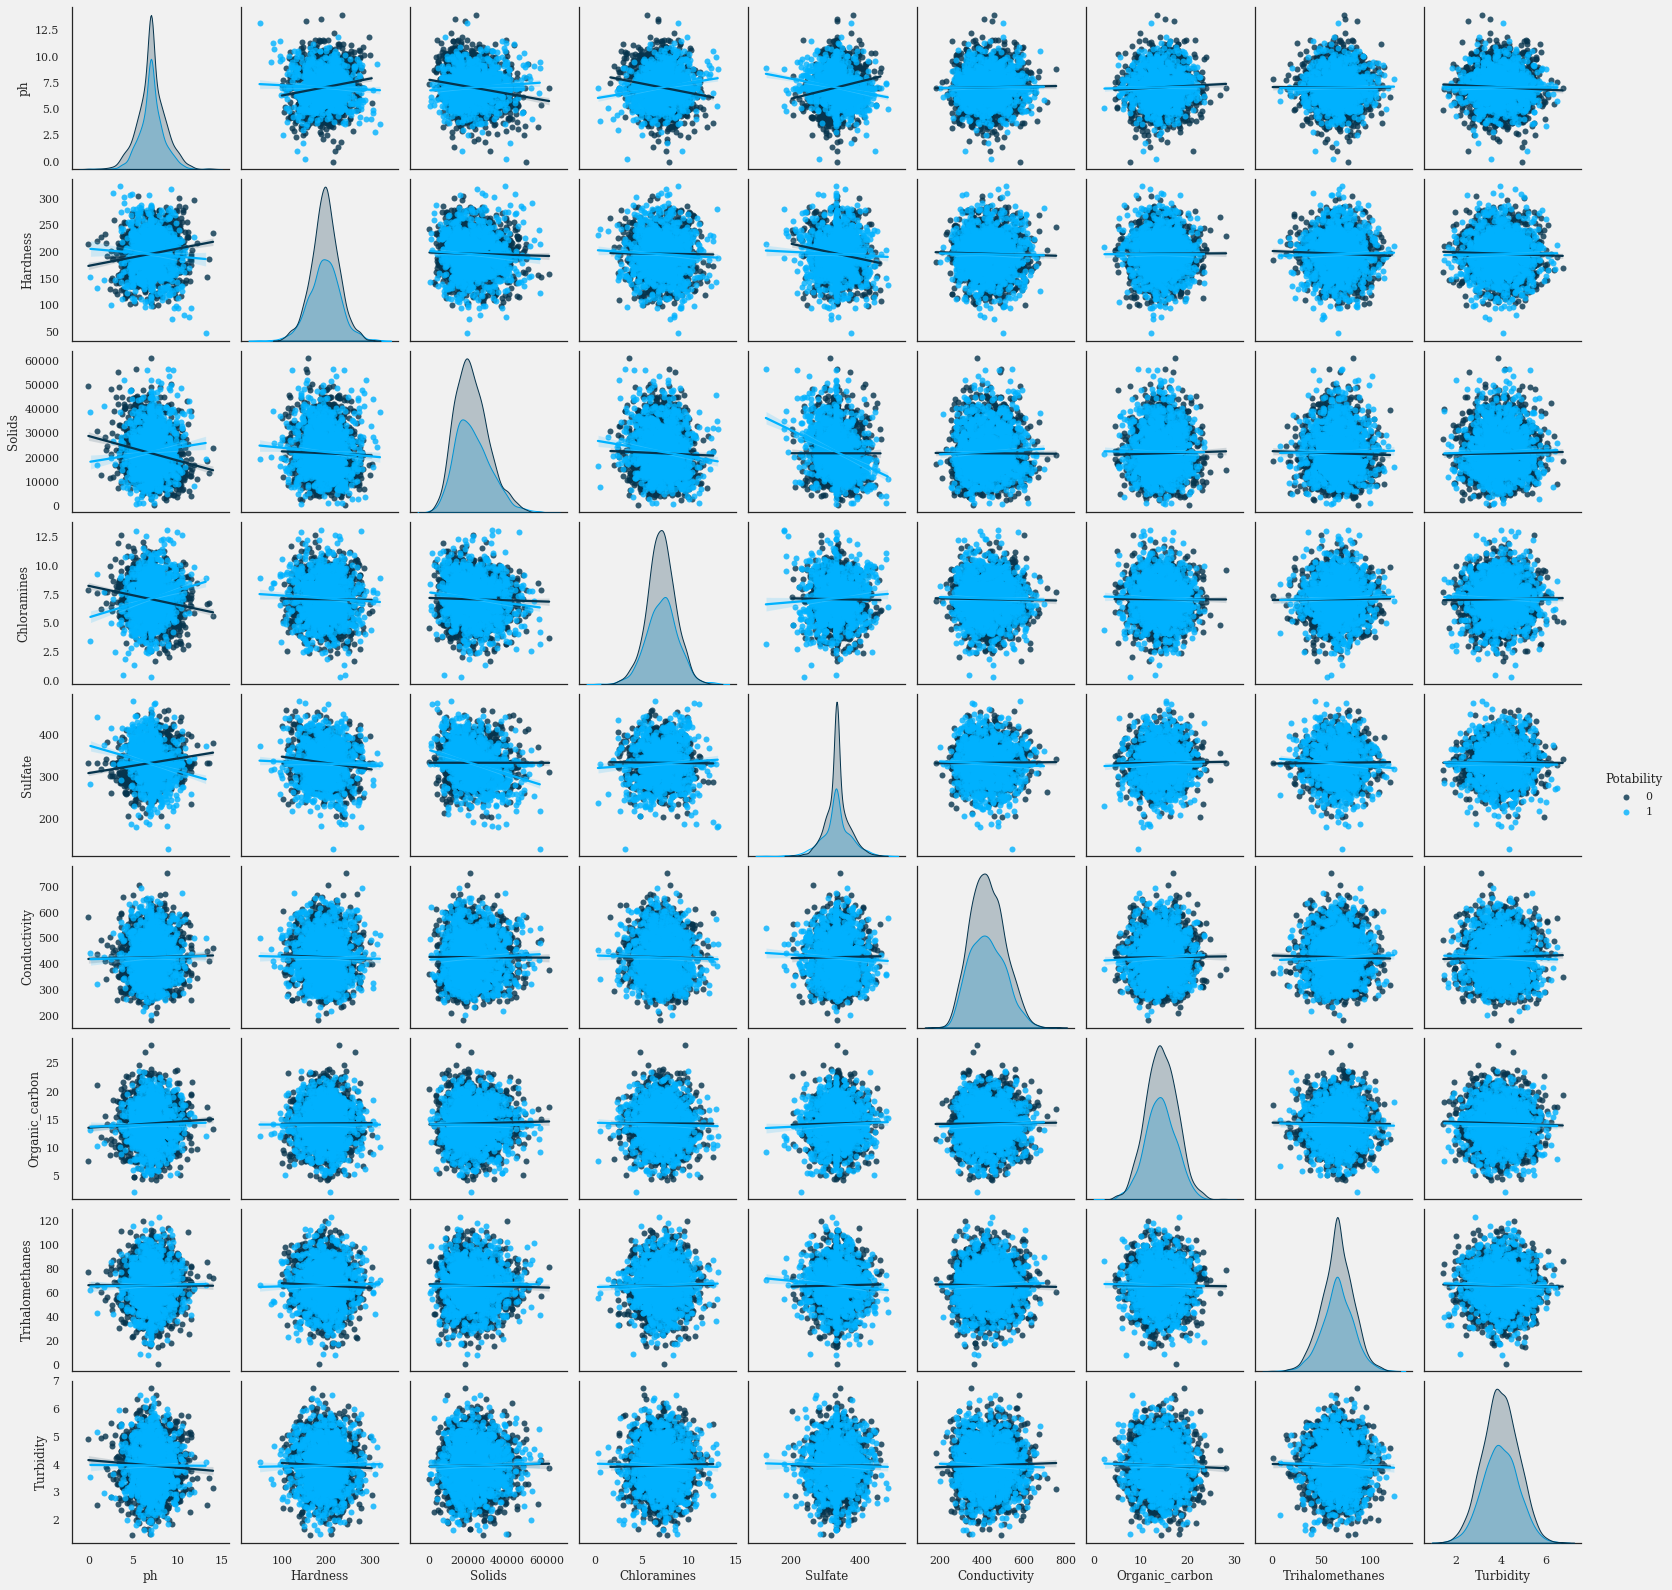

In [64]:
sns.pairplot(df, hue='Potability', kind='reg')

<AxesSubplot:>

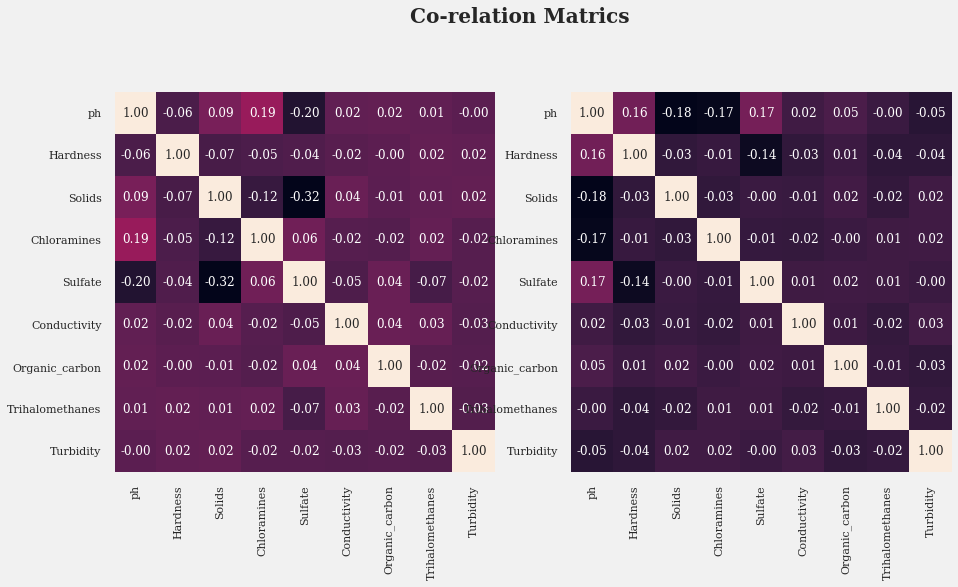

In [65]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(df[df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(df[df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

<AxesSubplot:>

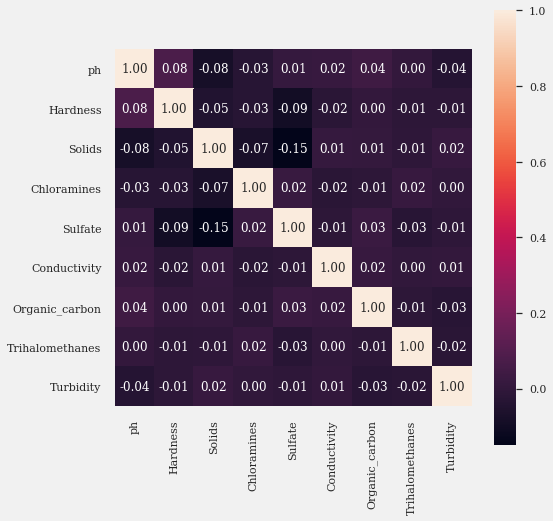

In [66]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

Baik matriks Co-relation & Pairplot mengatakan bahwa tidak ada hubungan linier antara fitur-fitur yang dapat menjelaskan variabel target. Jadi, model Linear mungkin tidak bekerja pada masalah ini. kita perlu mencoba dengan model berbasis probabilitas.

#### PCA to check the explained variance

<AxesSubplot:>

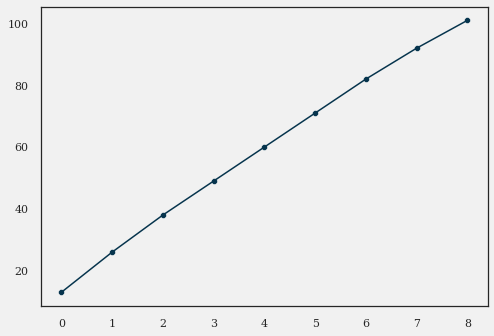

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(['Potability'], axis=1)
y=df['Potability']

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
decom = PCA(svd_solver='auto') #let try with auto rather than defining the components
decom.fit(X_scaled)
ex_var=np.cumsum(np.round(decom.explained_variance_ratio_,2))*100
sns.lineplot(y=ex_var, x=np.arange(0,len(ex_var)))
sns.scatterplot(y=ex_var, x=np.arange(0,len(ex_var)))

Seperti disebutkan di atas, semua fitur independen dan tidak memiliki hubungan linier apa pun. kita membutuhkan setidaknya 7 dimensi untuk menjelaskan 90% variasi. jadi pengurangan dimensi tidak membuat perubahan apa pun.

In [68]:
!pip install imblearn

In [69]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [70]:
pip install yellowbrick

In [71]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
4,ExtraTreeClassifier(),0.576956
5,KNeighborsClassifier(),0.650202
0,AdaBoostClassifier(),0.679097
3,DecisionTreeClassifier(),0.713030
1,BaggingClassifier(),0.744956
2,GradientBoostingClassifier(),0.753352


Dari teknik pemodelan dasar di atas, cv score ( cross Validasi score) untuk GradientBoosting & BaggingClassifier tinggi dibandingkan model lainnya. jadi, mari kita coba melakukan hyper tunning untuk model ini untuk meningkatkan akurasi

### lets try to fine tune the GradientBoosting & Bagging Classifier models

In [91]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")


Best Estimator: {'n_estimators': 600} , Best Score : 0.7590733743161694
Best Estimator: {'n_estimators': 600} , Best Score : 0.7758654334216908


***Model BaggingClassifier memberikan akurasi yang sedikit lebih tinggi daripada model Gradientboosting. fine tuining lebih lanjut bisa membawa skor akurasi lebih. Saya akan berhenti di sini mengingat waktu komputasi. mari kita coba memprediksi kumpulan data uji dengan parameter terbaik dari sel di atas dan memplot confusion matrix and classification reports***

### Try prediciting Test data send and find the accuracy of the model

### GradientBoosting

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       510
           1       0.63      0.77      0.69       309

    accuracy                           0.74       819
   macro avg       0.73      0.75      0.74       819
weighted avg       0.76      0.74      0.75       819



<AxesSubplot:>

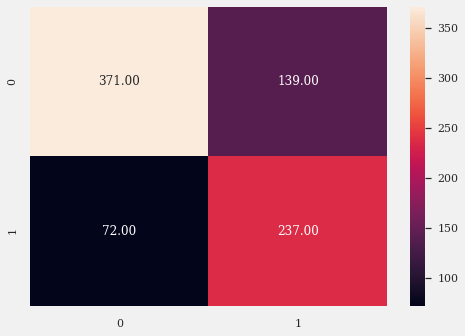

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
model = GradientBoostingClassifier(n_estimators=300)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')


### BaggingClassifier

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       510
           1       0.69      0.72      0.70       309

    accuracy                           0.77       819
   macro avg       0.75      0.76      0.76       819
weighted avg       0.77      0.77      0.77       819



<AxesSubplot:>

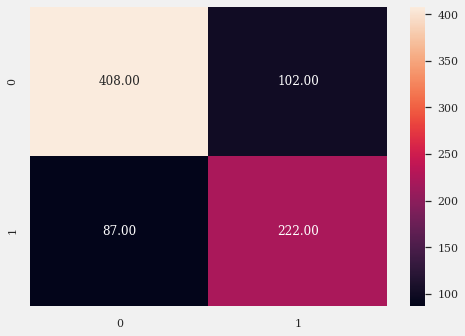

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
model = BaggingClassifier(n_estimators=80)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')


In [75]:
model.predict_proba(X_test)

array([[0.6375, 0.3625],
       [0.675 , 0.325 ],
       [0.7125, 0.2875],
       ...,
       [0.025 , 0.975 ],
       [0.8375, 0.1625],
       [0.475 , 0.525 ]])